<a href="https://colab.research.google.com/github/AY0ungKim/AI-Study/blob/main/Ensemble_Methods_and_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensemble Methods and Boosting

*서울대학교 데이터사이언스대학원 이준석 교수님 강의 정리*

## **1. Bootstrapping**

**1) 정의**: 하나의 데이터셋을 복원추출로 여러번 *Resampling*을 하여서 **uncertainty를 줄이는** 방식

> 아래 수식으로 B번 bootstrap한 데이터넷에서 각 parameter를 추정하고, 그걸 평균내서하여 error 구함

> 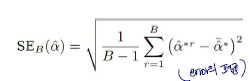


**2) 가정**: resampling된 sample들은 서로 **i.i.d**하다는 가정 (time-series라면 랜덤복원추출을 하는 가정이 깨질 것)

> 참고로, bootstrap으로 prediction error를 estimate하는 것은 불가능함 (cross-validation할 때는 **overlap이 없어야**한다는 것을 위배하기 때문 (bootstrapping을 하면 각 sample들이 서로 2/3정도 겹치는 데이터 존재하게 됨)



---

## **2. Bagging (Bootstrap Aggregation)**

**1) 정의**: B개의 bootstrap된 데이터셋을 만들고, 각 b번째 bootstrap된 학습데이터에서 특정 모델로 학습을 하여서, 그걸 aggregate (보통 regression에서는 평균내거나 classification에서는 다수결)하는 방식

> 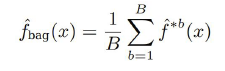



**2) 장점**: *bias*에 대한 손실 없이, **variance를 무조건 감소**시킬 수 있는 방법 -> MSE가 무조건 감소하게 됨!! (하지만, bootstrapping을 하면 computation burden이 커질 수는 있음)


>**Expected error)**

> - h(x)가 진짜 true값, yb(x)가 b번째 model에서 예측한 값, eb(x)가 b번째 model에서의 error

>> single model

>> 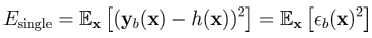

>> combined model

>> 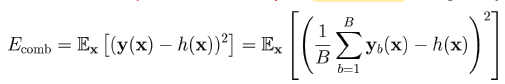


> **Theorem 1)** combined model (bootstrap으로 bagging한)의 expected error는 single model의 expected error보다 *무조건 작거나 같다*

>> (Jensen's inequality로 증명 가능)

>>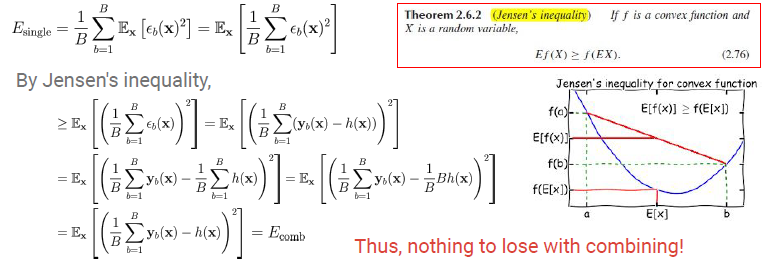


> **Therem 2)** combined model의 expected error는 single model의 expected error의 1/B까지 낮아질 수 있음 (B model들이 서로 독립적일수록 더 낮아짐)



---


## **3. Bagging with Decision Trees**

**Random Forest**

- 방식: bootstrapping으로 랜덤하게 모든 훈련 데이터를 decision tree 학습시킬 때, 전체 predictor가 아닌, m개의 predictor만 랜덤으로 골라서 예측하고 이를 합쳐주는 방식 (보통 m은 전체 precitor의 개수의 루트값)

>> (m을 몇개를 선정하느냐도 error에 영향을 크게 줌)

>> 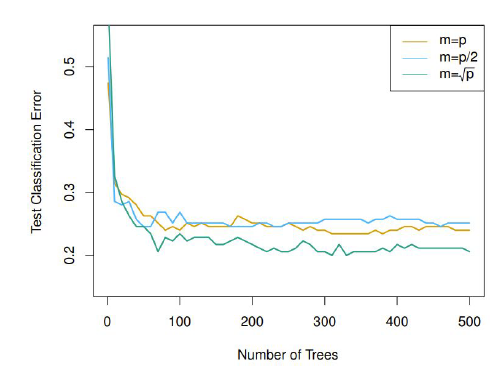





---



## **4. Boosting**

**1) 정의**: bagging과는 다르게 (모든 training set을 각각 학습시켜서 합치는 것), **sequential한 방식으로** model을 순차적으로 학습하는 방식



**2) AdaBoost**

- **정의**: 초기 모형을 weak learner(약한 모형)으로 설정하여서, 매 스텝마다 가중치를 이용하여 이전 모형의 약점을 보완하는 새로운 모형을 순차적으로 적합한 뒤 최종적으로 이들을 linearly combine하여 얻어진 모형을 적합시키는 모형

- **알고리즘**


>> (예) i=1,...,n 에서 y=-1 or y=1 분류

>> (1) 초기 가중치 세팅 (uniform distribution)

>> 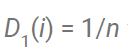

>> (2) t=1,...,T에서 **T개의 base learner을 순차적으로 학습**

>>> t번째 model의 가중치를 Dt라고 할 때, 정답이 아닐 확률 = error rate을 다음과 같이 구함

>>> image.png

>>> alpha(t)를 log(success rate/error rate)로 설정

>>> 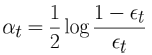

>>> 다음 모델의 가중치인 t+1번째 D(t+1)을 다음과 같이 조정함 (정답이 맞다면, yi와 hx를 곱한 값이 양수, 틀리다면 음수가 되므로 **정답이 맞을 경우 다음 모델의 가중치는 더 작아질 것이고, 틀릴경우 더 커질 것임**

>>> 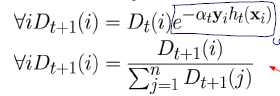

>>> 그 다음 정규화 진행

>>> 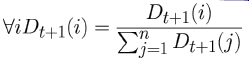

>> (3) 최종 모델은 base learner들의 weighted sum 형태로 나타나게 됨

>>> 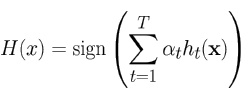

>>> 이때, alpha(t)는 보통 **양수**여야 함

- **특징**

>> 1) **overfitting에 robust**

>> 2) **stagewise additive learning** with **exponential loss**에서 **missclassification rate을 최소화**하는 방식과 같음


- **그림으로 설명**

> 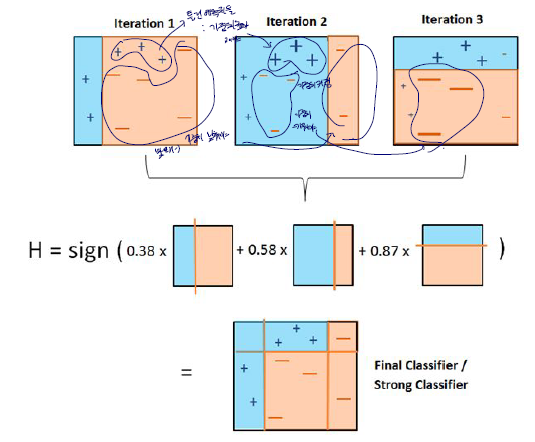

> 위 그림을 보면, Iterlation 1에서 틀리게 예측된 값들이 2에서는 더 커진 것을 확인할 수 있음. 이는 가중치를 크게 함으로서 놓친 부분에 대한 fitting을 진행하는 방식이라는 것을 확인. 이렇게 만든 3개의 iteration을 선형결합해서 final classifier를 만드는 과정

**3) Boosting for Regression**

- 다음 모델에서 그 전 모델의 오차를 예측하게 하는 residual을 예측하는 모형을 만들면 됨 -> **Residual-based Learning**


## **정리**

- Decision tree는 predictin accuracy가 작다는 단점이 있지만, 이를 Bagging, random forests, boosting을 활용하여 **tree의 정확도를 더 향상**시킬 수 있음 (단, 해석력이 떨어질 수 있음)